In [1]:
import pandas as pd
from my_libs import lib_tools as pt
from joblib import load

run_type = 'prd'
columns = None

X_train, y_train, X_valid, y_valid, X_test, y_test = pt.get_train_valid_test_data(run_type, columns)
print("Train, Valid and Test data loaded")

cols = ['dep', 'catv', 'catr', 'col', 'agg', 'trajet', 'mois', 'catu', 'situ', 'place']
X_train = X_train[cols]
X_valid = X_valid[cols]
X_test = X_test[cols]


model = load(f'h5_models/model_cb_{run_type}_{X_train.shape[0]}x{X_train.shape[1]}.h5')

Train, Valid and Test data loaded


In [2]:
y_pred = model.predict(X_test)


In [3]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.87756658, 0.12243342],
       [0.36645215, 0.63354785],
       [0.72407673, 0.27592327],
       ...,
       [0.75776263, 0.24223737],
       [0.76945823, 0.23054177],
       [0.76765906, 0.23234094]])

In [4]:
import numpy as np


i = int(np.random.uniform(low=0, high=X_test.shape[0]-1))

y_pred_prob_single = model.predict_proba(X_test.iloc[i, :])[1]
y_pred_prob_single

0.5148767603029165

Text(0.5, 1.0, "Probabilité d'accident grave : 0.10% - Vraie valeur : 0")

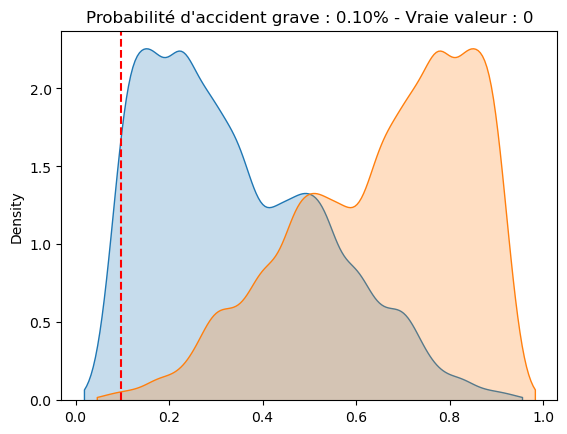

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
n = X_test.shape[0]

i = int(np.random.uniform(low=0, high=n))
y_pred_prob_single = model.predict_proba(X_test.iloc[i, :])[1]
y_true = y_test.values[i]

ax1 = sns.kdeplot(y_pred_proba[:, 1], shade=True, cut=0);
ax2 = sns.kdeplot(y_pred_proba[:, 0], shade=True, cut=0);

plt.axvline(x=y_pred_prob_single, color='r', linestyle='--');
plt.title(f"Probabilité d'accident grave : {y_pred_prob_single:.2f}% - Vraie valeur : {y_true}")


In [6]:
x_vals = ax.lines[0].get_xdata()
y_vals = ax.lines[0].get_ydata()

NameError: name 'ax' is not defined

In [ ]:
print(x_vals)
print(y_vals)